In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


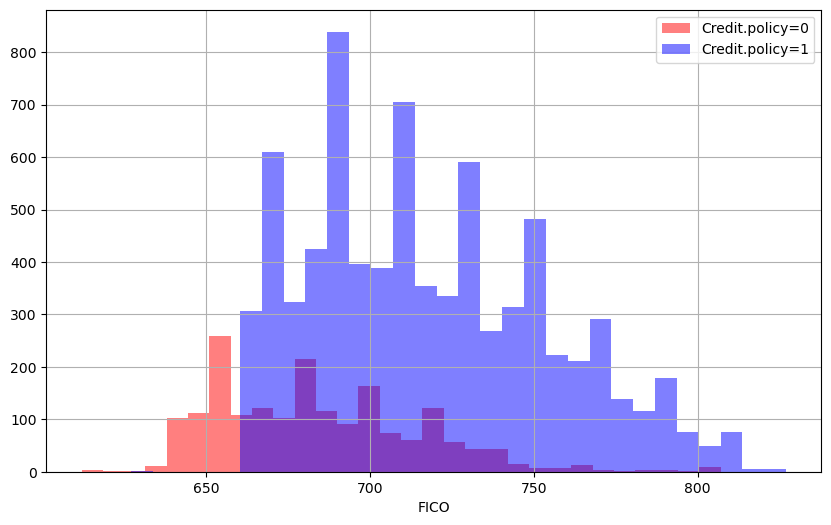

In [7]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.policy=0')
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.policy=1')
plt.xlabel('FICO')
plt.legend()

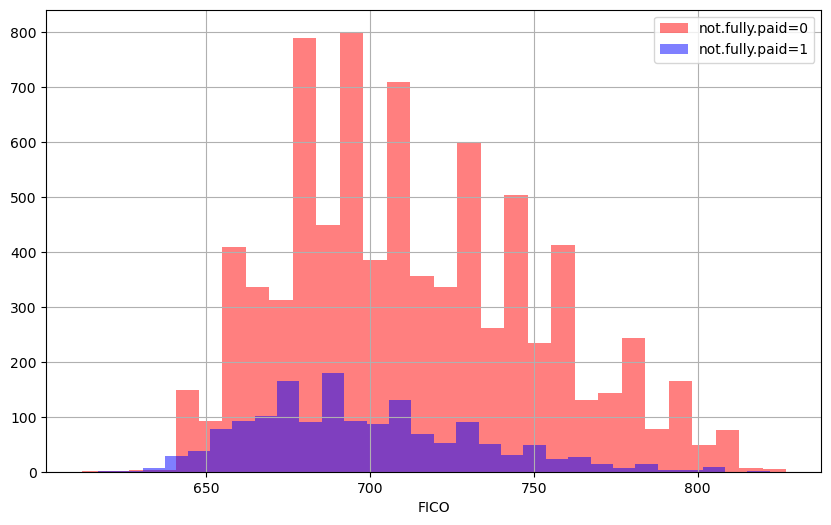

In [8]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
plt.xlabel('FICO')
plt.legend()

<Axes: xlabel='purpose', ylabel='count'>

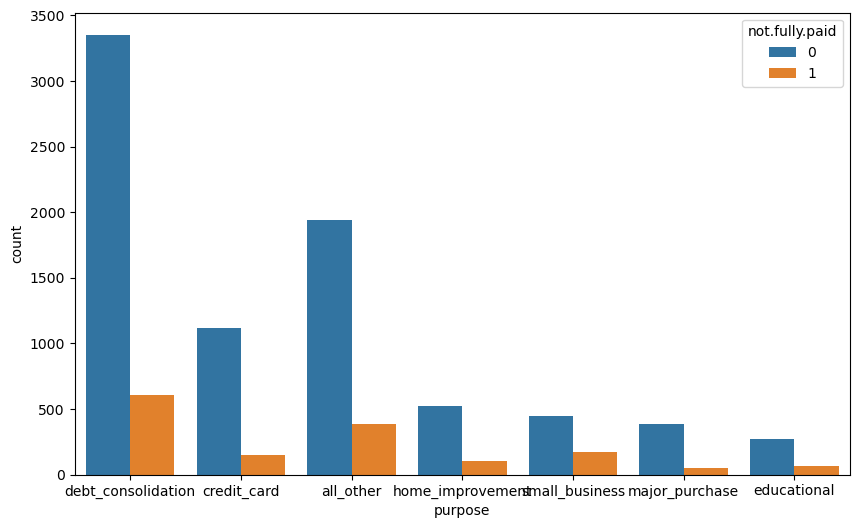

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['purpose'],hue=df['not.fully.paid'])

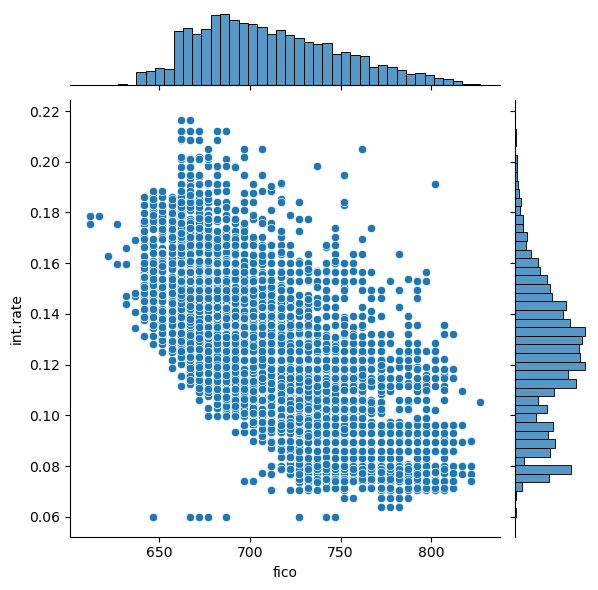

In [10]:
sns.jointplot(x='fico',y='int.rate',data=df)

<Figure size 1000x600 with 0 Axes>

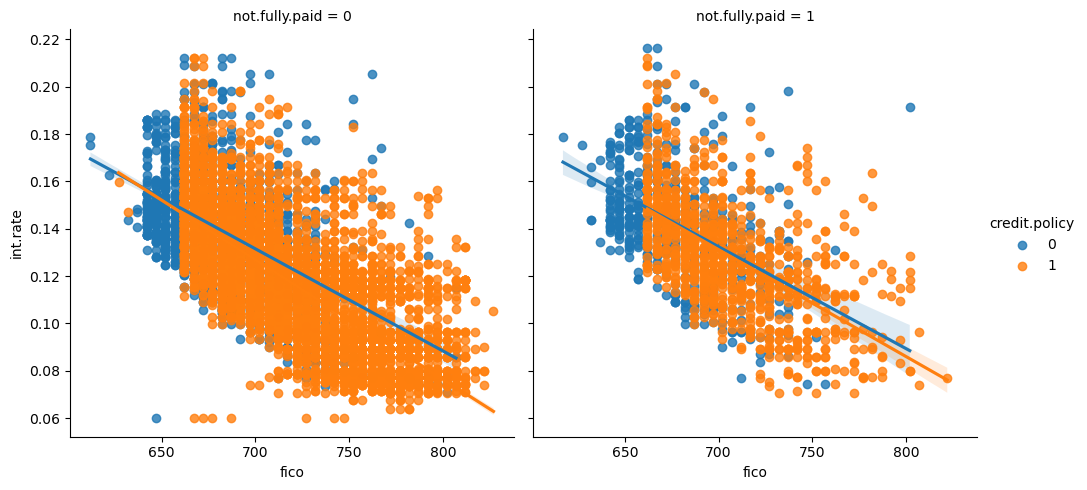

In [11]:
plt.figure(figsize=(10,6))
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid')

In [12]:
loans = pd.get_dummies(data=df,columns=['purpose'],drop_first=True)
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
scaler.fit(loans.drop(['credit.policy','not.fully.paid','purpose_credit_card','purpose_debt_consolidation','purpose_educational'
                       ,'purpose_home_improvement','purpose_major_purchase','purpose_small_business'],axis=1))

StandardScaler()

In [15]:
scaled_loans= scaler.transform(loans.drop(['credit.policy','not.fully.paid','purpose_credit_card','purpose_debt_consolidation',
                                           'purpose_educational','purpose_home_improvement','purpose_major_purchase','purpose_small_business'],axis=1))

In [16]:
df = pd.DataFrame(scaled_loans,columns=loans.columns[1:12])
df.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003


In [17]:
final_data= pd.concat([df,loans[['credit.policy','not.fully.paid','purpose_credit_card','purpose_debt_consolidation',
                                 'purpose_educational','purpose_home_improvement','purpose_major_purchase',
                                 'purpose_small_business']]],axis=1)
final_data.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,credit.policy,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,1,0,0,1,0,0,0,0
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,1,0,1,0,0,0,0,0
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,1,0,0,1,0,0,0,0
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,1,0,0,1,0,0,0,0
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,1,0,1,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = final_data.drop('not.fully.paid',axis=1)
y =final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
DecisionTreeClassifier()
prediction = dtree.predict(X_test)
pd.DataFrame({'label':y_test,'Predictions':prediction}).head()

,label,Predictions
5244,0,0
1739,0,1
2780,0,0
7062,0,1
6661,0,0


In [24]:
print((dtree.score(X_test,y_test))*100)

73.17327766179541


In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))

[[2004  427]
 [ 344   99]]


In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
pred = rfc.predict(X_test)
pd.DataFrame({'Label':y_test,'Predictions':pred}).head()

,Label,Predictions
5244,0,0
1739,0,0
2780,0,0
7062,0,0
6661,0,0


In [31]:
print((rfc.score(X_test,y_test))*100)

84.48155880306193


In [32]:
print(confusion_matrix(y_test,pred))

[[2416   15]
 [ 431   12]]


In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.44      0.03      0.05       443

    accuracy                           0.84      2874
   macro avg       0.65      0.51      0.48      2874
weighted avg       0.79      0.84      0.78      2874



In [34]:
pd.DataFrame({'Features':X.columns,'Values':rfc.feature_importances_}).sort_values('Values',ascending=False)

,Features,Values
1,installment,0.114863
7,revol.util,0.114746
5,days.with.cr.line,0.112840
6,revol.bal,0.112383
2,log.annual.inc,0.108385
3,dti,0.108082
0,int.rate,0.102856
4,fico,0.080172
8,inq.last.6mths,0.053387
9,delinq.2yrs,0.015409


In [35]:
from sklearn.neighbors import KNeighborsClassifier

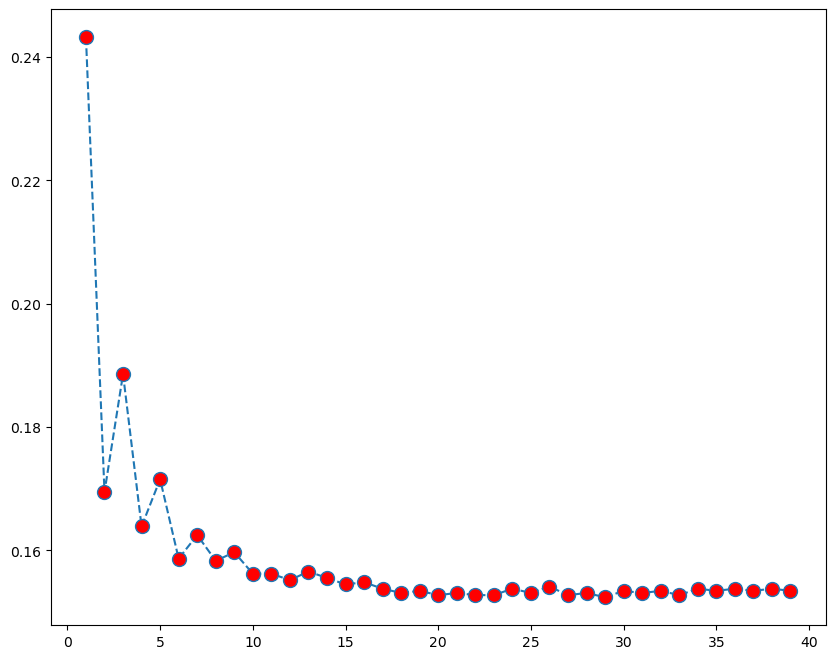

In [36]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred1=knn.predict(X_test)
    error_rate.append(np.mean(pred1 != y_test))

plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,marker='o',markerfacecolor='red',ls='--',markersize=10)

In [37]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [39]:
pred1=knn.predict(X_test)
print((knn.score(X_test,y_test))*100)

84.72512178148921


In [40]:
print(confusion_matrix(y_test,pred1))

[[2429    2]
 [ 437    6]]


In [41]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.75      0.01      0.03       443

    accuracy                           0.85      2874
   macro avg       0.80      0.51      0.47      2874
weighted avg       0.83      0.85      0.78      2874

